# Assessment Stage-1 Code (Data Science for Innovation-36100)

# Stroke Prediction

Stroke is a leading cause of death globally, responsible for approximately 11% of total deaths according to the World Health Organization (WHO). It occurs when blood flow to the brain is interrupted, leading to severe consequences such as physical and cognitive impairments. Early detection and prevention are crucial.

In the initial stage of our analysis, this dataset serves as the foundation for predicting the likelihood of stroke occurrence in patients. It relies on input parameters such as gender, age, presence of various diseases, and smoking status. Each row in the dataset furnishes pertinent information about individual patients. We will embark on this exploratory journey to gain insights through exploratory data analysis (EDA) and uncover patterns and relationships within the data.

## 0.Importing Packages

In [2]:
#Importing necessary libraries required for Exploratory Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Loading the Dataset

In [4]:
from google.colab import files

# Defining list of files we need to run this experiment
file_names = ["healthcare-dataset-stroke-data.csv"]

# Loop through the list and upload each file
for file_name in file_names:
    uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## 3. Exploring dataset

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
df.shape

(5110, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 3.1 Checking for duplicate values

In [10]:
#Finding Duplicate rows in the dataframe & Removing duplicate rows from the dataset

def drop_duplicates(df):
    # Check for duplicate rows
    duplicate_rows = df[df.duplicated()]

    if duplicate_rows.empty:
        print("No duplicate rows found!")
    else:
        print("Duplicate Rows:")
        print(duplicate_rows)

        # Drop duplicate rows
        df.drop_duplicates(inplace=True)
        print("Duplicate rows have been dropped.")

# Call the function with your DataFrame
drop_duplicates(df=df)

No duplicate rows found!


### 3.2 Checking for Null/Missing values

In [11]:
#Finding Null/Missing Value rows in the dataframe
print('Data columns with missing values values:',df.isnull().sum(), sep = '\n')

Data columns with missing values values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Missing Values:
bmi    201
dtype: int64


<Figure size 800x400 with 0 Axes>

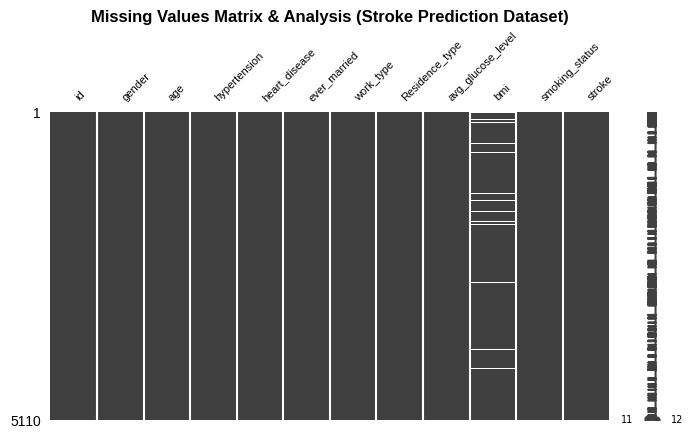

In [12]:
import missingno as msno

def check_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Filter out columns with missing values
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found!")
    else:
        print("Missing Values:")
        print(missing_values)

        # Visualize missing values using missingno
        plt.figure(figsize=(8, 4))  # Adjust the plot size
        msno.matrix(df, figsize=(8, 4), fontsize=8)  # Set the font size
        plt.title('Missing Values Matrix & Analysis (Stroke Prediction Dataset)', fontsize=12, fontname='Liberation Sans', fontweight='bold')
        plt.xticks(fontname='Liberation Sans')  # Set x-axis font to Liberation Sans
        plt.yticks(fontname='Liberation Sans')  # Set y-axis font to Liberation Sans
        plt.show()

# Call the function with your DataFrame
check_missing_values(df=df)

### 3.3 Imputing Missing BMI values by Regression

After conducting a thorough analysis of missing values in the dataset, it was revealed that there were approximately 201 missing values in the BMI column. To address this issue, we have opted to fill in the missing BMI values with the mean value of the column. This straightforward approach aims to enhance the completeness and reliability of the dataset for subsequent analyses, ensuring that no NaN values remain in the 'bmi' column.

In [13]:
# Drop 'id' since it is not relevant to our analysis
df = df.drop(columns=['id'])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
# Select predictors
predictors = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']

# Split the data
train_data = df.dropna(subset=['bmi'])
predict_data = df[df['bmi'].isnull()]

X_train = train_data[predictors]
y_train = train_data['bmi']
X_predict = predict_data[predictors]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing BMI values
predicted_bmi = model.predict(X_predict)

# Impute the predicted BMI values
df.loc[df['bmi'].isnull(), 'bmi'] = predicted_bmi

# Evaluate the model (optional)
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 53.58066536153232


In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.773098,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
print('Data columns with missing values values:',df.isnull().sum(), sep = '\n')

Data columns with missing values values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [18]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.938857,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.723115,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.200000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.991628,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 4. Exploring Variables

In [18]:
def get_column_lists(df):
    # List of categorical columns for one-hot encoding
    categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']

    # List of numerical columns to standardized data
    numerical_columns = [col for col in df.columns if df.dtypes[col] != 'object']

    return numerical_columns, categorical_columns

# Call the function with your DataFrame
numerical_cols, categorical_cols = get_column_lists(df)

print('Numerical Features are:', numerical_cols)
print('Categorical Features are:', categorical_cols)

Numerical Features are: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Categorical Features are: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [19]:
df['stroke'].value_counts().to_frame()

,count
stroke,
0,4861
1,249


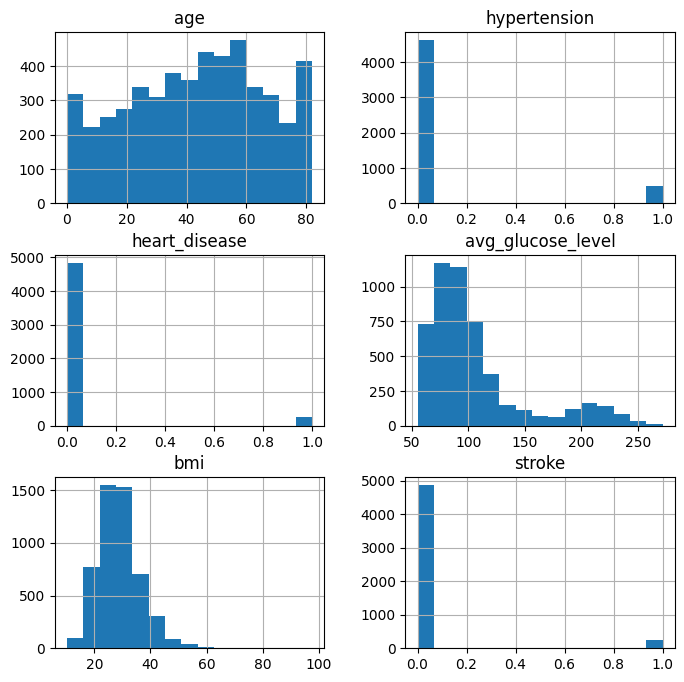

In [20]:
# Assuming numerical_cols is a list of numerical column names
df[numerical_cols].hist(bins=15, figsize=(8, 8), layout=(3, 2))
plt.show()

### **Observation from Histograms**

- **Age**: The histogram displays a bimodal distribution, revealing two prominent peaks. This suggests that the dataset comprises two distinct age groups, one younger and another older.

- **Hypertension**: The distribution is highly skewed towards the value 0, indicating that the majority of individuals in the dataset are not afflicted with hypertension. Only a small fraction shows a value of 1, signifying the presence of hypertension.

- **Heart Disease**: Similar to the hypertension histogram, this distribution is heavily skewed towards 0, indicating that the majority of individuals do not suffer from heart disease. A minority shows a value of 1, indicating the presence of heart disease.

- **Average Glucose Level (avg_glucose_level)**: The histogram demonstrates a right-skewed distribution. Most individuals exhibit lower average glucose levels, but a long tail towards higher glucose levels suggests a smaller proportion with elevated levels.

- **BMI**: The Body Mass Index (BMI) histogram appears to be approximately normally distributed with a slight right skew. The majority of individuals have a BMI around the middle range, with fewer individuals exhibiting very high BMIs, as indicated by the tail.

## 5.Data Plots : All variables

In [21]:
from scipy.stats import norm
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

def plot_numerical_distribution(df, numerical_cols, font_size=10):
    # Adjust font size and style
    plt.rcParams.update({'font.size': font_size, 'font.family': 'Liberation Sans'})

    # Loop through all numerical columns to plot
    for col in numerical_cols:
        # Set up the matplotlib figure with smaller size
        plt.figure(figsize=(6, 3))

        # Plot a histogram with kernel density estimate (KDE)
        sns.histplot(df[col], kde=True, color="blue", stat="density", bins=30)

        # Fit a normal distribution to the data and plot it
        mu, std = norm.fit(df[col])
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, linewidth=2, color="red")

        plt.title(f'Multimodal Distribution of {col}', fontsize=12)
        plt.xlabel(col, fontsize=font_size)
        plt.ylabel('Density', fontsize=font_size)

        # Show the plot
        plt.show()

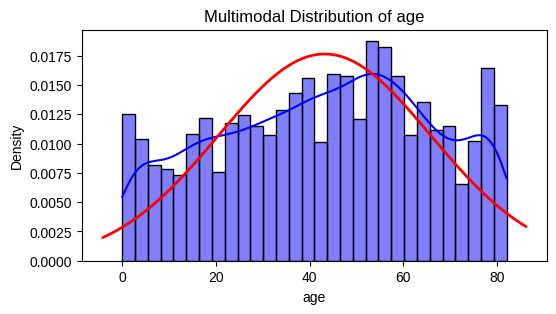

In [22]:
plot_numerical_distribution(df, ['age'])

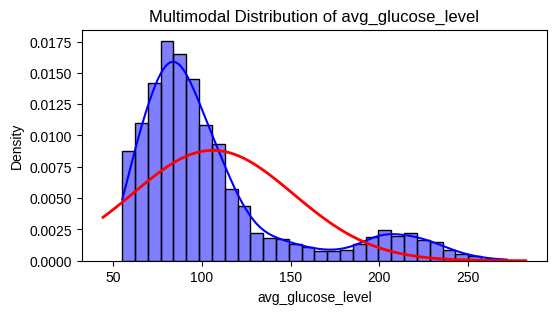

In [23]:
plot_numerical_distribution(df, ['avg_glucose_level'])

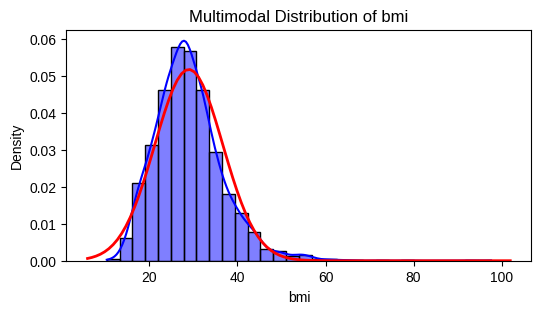

In [24]:
plot_numerical_distribution(df, ['bmi'])

### 5.1 Observation from Multimodal Distribution

- The age distribution exhibits a multimodal pattern, characterized by multiple peaks, indicating the prevalence of several distinct age groups within the dataset. The overlay of a red curve, representing a fitted normal distribution, does not align closely with the actual distribution. This discrepancy highlights the non-normal nature of the age distribution, characterized by multiple clusters rather than a single unimodal distribution.

- The histogram depicting the average glucose level reveals a right-skewed distribution, evidenced by a prolonged tail extending towards higher glucose levels. This skewness suggests a prevalence of individuals with lower glucose levels, juxtaposed with a notable subset exhibiting higher glucose levels. The attempt to fit a normal distribution curve fails to encapsulate this asymmetry, thus underscoring the non-normal distribution of average glucose levels.

- The BMI histogram reveals a unimodal distribution with a notable peak, slightly skewed towards the right. This suggests that the majority of individuals exhibit BMI values clustered around a specific point, with fewer individuals displaying either very low or very high BMI values. While the normal distribution curve aligns well with the peak of the histogram, it fails to accurately represent the tail, indicating a slight deviation from normality.

In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_qq_plots(df, numerical_cols, font_size=10):

    # Adjust font size and style
    plt.rcParams.update({'font.size': font_size, 'font.family': 'Liberation Sans'})

    # Loop through all numerical columns to plot
    for col in numerical_cols:
        # Set up the matplotlib figure with smaller size
        plt.figure(figsize=(6, 3))

        # Generate QQ plot
        sm.qqplot(df[col], line='s')

        plt.title(f'QQ Plot of {col}', fontsize=12)
        plt.xlabel(f'Theoretical Quantiles ({col})', fontsize=font_size)
        plt.ylabel(f'Ordered Values ({col})', fontsize=font_size)

        # Show the plot
        plt.show()

<Figure size 600x300 with 0 Axes>

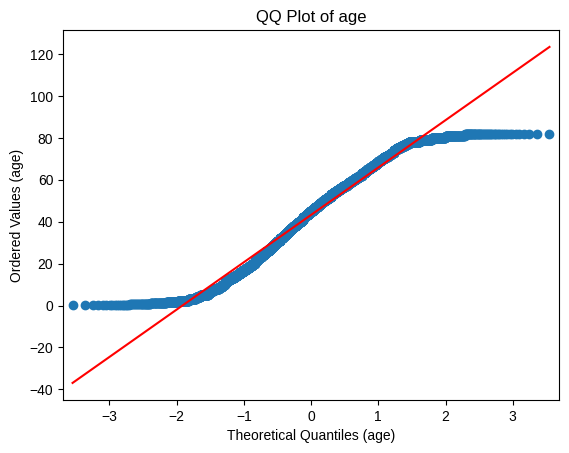

In [26]:
plot_qq_plots(df, ['age'])

<Figure size 600x300 with 0 Axes>

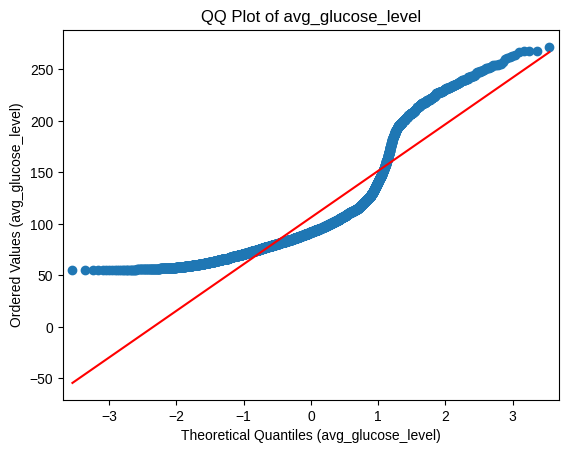

In [27]:
plot_qq_plots(df, ['avg_glucose_level'])

<Figure size 600x300 with 0 Axes>

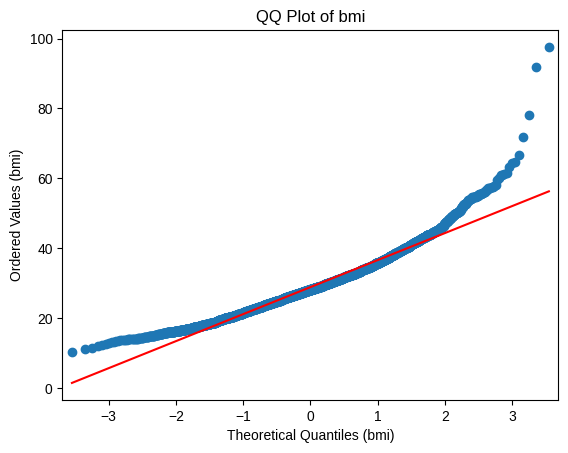

In [28]:
plot_qq_plots(df, ['bmi'])

The Yeo-Johnson transformation is utilized on our numerical data. This transformation seeks the optimal value of λ that maximizes the log-likelihood function, aiming to render the data as closely approximating a normal distribution as feasible.

In [20]:
from scipy.stats import yeojohnson
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def transform_numerical_cols(df, numerical_cols):
    # Create a copy of the dataframe to avoid modifying the original dataframe
    df = df.copy()

    # Apply Yeo-Johnson transformation to the numerical variables
    for variable in numerical_cols:
        df[variable], _ = yeojohnson(df[variable])

    return df

def plot_transformed_qq_plots(df, numerical_cols):

    # Apply Yeo-Johnson transformation to the numerical variables
    df = transform_numerical_cols(df, numerical_cols)

    # Generate QQ plots for the transformed variables using statsmodels
    for variable in numerical_cols:
        # Create a Q-Q plot
        qqplot(df[variable], line='s')
        plt.title(f'Residual QQ Plot of {variable.upper()} (After Transformation)')
        plt.show()

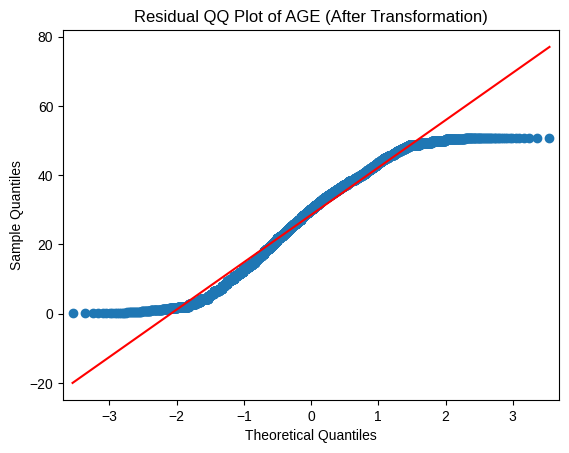

In [30]:
plot_transformed_qq_plots(df, ['age'])

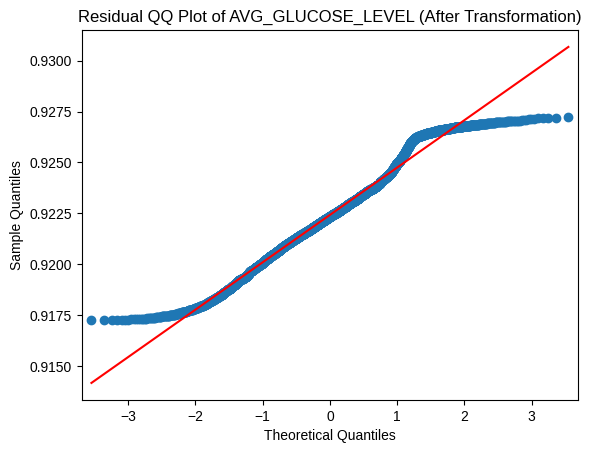

In [31]:
plot_transformed_qq_plots(df, ['avg_glucose_level'])

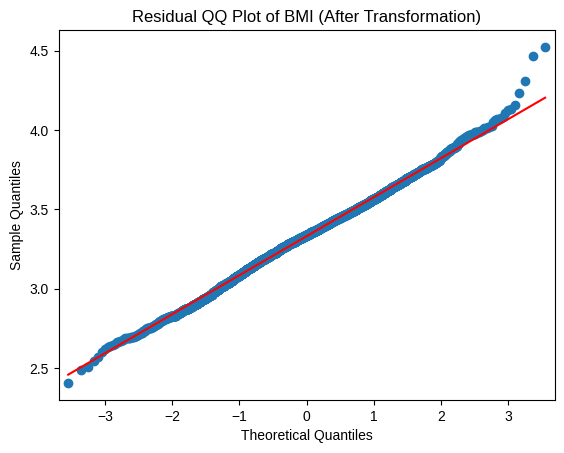

In [32]:
plot_transformed_qq_plots(df, ['bmi'])

### 5.2 Outlier Detection Analysis

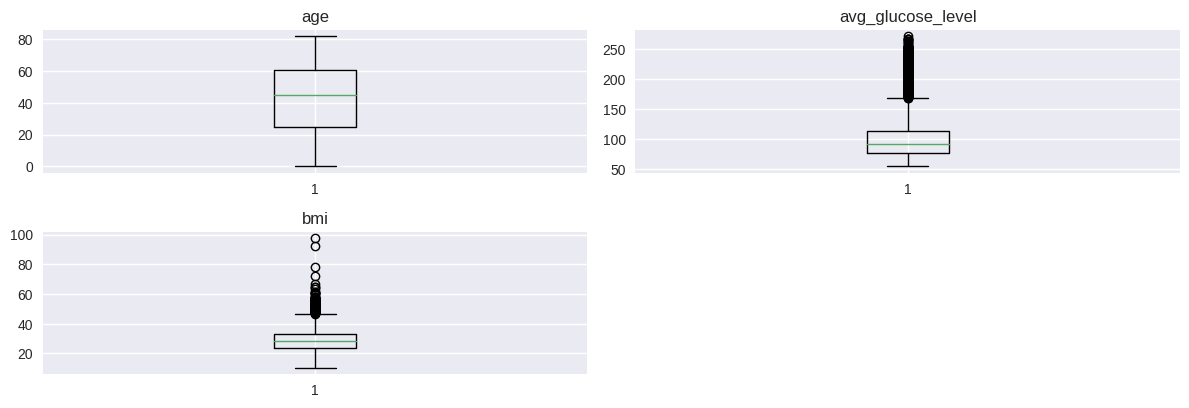

In [33]:
plt.figure(figsize=(12, 10))
plt.style.use('seaborn-v0_8')

variables = ['age','avg_glucose_level','bmi']

for i, variable in enumerate(variables, start=1):
    plt.subplot(5, 2, i)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.tight_layout()
plt.show()

### 5.2.1 Observation from Outlier Detection Analysis

In our analysis, we have observed that there are significant outliers present in the BMI (Body Mass Index) column. These outliers may have emerged as a result of replacing missing BMI values with the mean value in certain observations. This method of imputation, while convenient, can potentially distort the distribution of BMI values, leading to the presence of outliers. Therefore, it's essential to be mindful of these outliers and consider their potential impact on our analyses and interpretations. Further investigation and robust outlier detection techniques may be warranted to address this issue effectively.

In [34]:
#Defining Quartiles for removal of outliers- BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR), i.e. difference between the 75th and 25th pecentiles
total_outlier_num = ((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))).sum()
#print(IQR)
print("Total Number of Outliers in BMI: {}".format(total_outlier_num))

Total Number of Outliers in BMI: 120


In [35]:
#Person with the highest BMI
df[df['bmi'] == df['bmi'].max()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


In [ ]:
#numerical_features=['bmi']
#for cols in numerical_features:
 #   Q1 = df[cols].quantile(0.25)
  #  Q3 = df[cols].quantile(0.75)
  #  IQR = Q3 - Q1

   # filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
   # df=df.loc[filter]

In [ ]:
#plt.figure(figsize=(12, 10))
#plt.style.use('seaborn-v0_8')

#variables = ['bmi']

#for i, variable in enumerate(variables, start=1):
 #   plt.subplot(5, 2, i)
  #  plt.boxplot(df[variable])
  #  plt.title(variable)

#plt.tight_layout()
#plt.show()

## 6. Data Plots : Target Variable Distribution

### 6.1 Distribution of Target Variable: Whether a person has a stroke or not

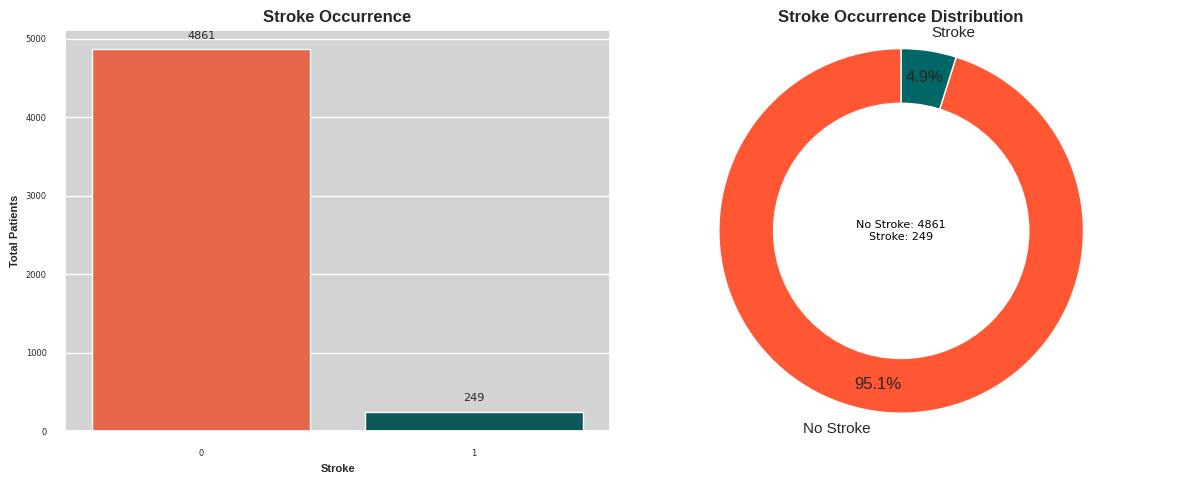

In [36]:
# Define custom colors
palette_features = ['#FF5733', '#006666']

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot countplot on the first subplot
sns.countplot(data=df, x='stroke', palette=palette_features, hue='stroke', ax=axes[0], legend=False)
axes[0].set_title('Stroke Occurrence', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
axes[0].set_xlabel('Stroke', fontsize=8, fontweight='bold', fontname='Liberation Sans')
axes[0].set_ylabel('Total Patients', fontsize=8, fontweight='bold', fontname='Liberation Sans')
axes[0].tick_params(axis='both', labelsize=6)

# Add labels to the bars
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=8)  # Adjust label font size

# Plot pie chart on the second subplot
stroke_counts = df['stroke'].value_counts()
stroke_distribution = df['stroke'].value_counts(normalize=True) * 100

axes[1].pie(stroke_distribution, labels=stroke_distribution.index.map({0: 'No Stroke', 1: 'Stroke'}),
            autopct='%1.1f%%', colors=palette_features, pctdistance=0.85, startangle=90,
            textprops={'fontname': 'Liberation Sans'})  # Set fontname for labels in pie chart

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
total_counts = f"No Stroke: {stroke_counts[0]}\nStroke: {stroke_counts[1]}"
axes[1].text(x=0, y=0, s=total_counts, horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')  # Adjust text font size
axes[1].axis('equal')
axes[1].set_title('Stroke Occurrence Distribution', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

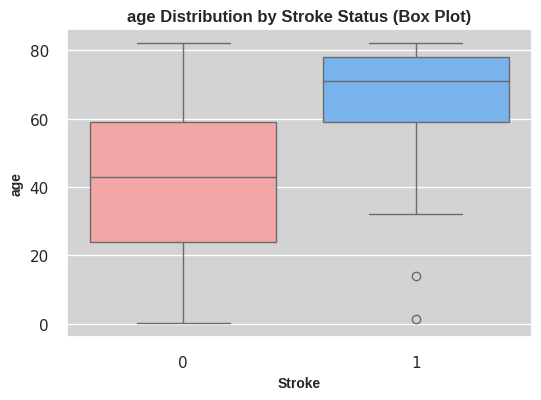

In [37]:
def plot_box_plots(df, continuous_features):

    # Define custom colors and font style
    custom_palette = ['#ff9999', '#66b3ff']
    font_family = 'Liberation Sans'

    for column in continuous_features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='stroke', y=column, hue='stroke', data=df, palette=custom_palette, legend=False)
        plt.title(f'{column} Distribution by Stroke Status (Box Plot)', fontfamily=font_family, fontsize=12, fontweight='bold')
        plt.xlabel('Stroke', fontfamily=font_family, fontsize=10, fontweight='bold')
        plt.ylabel(column, fontfamily=font_family, fontsize=10, fontweight='bold')
        plt.show()

plot_box_plots(df, ['age'])

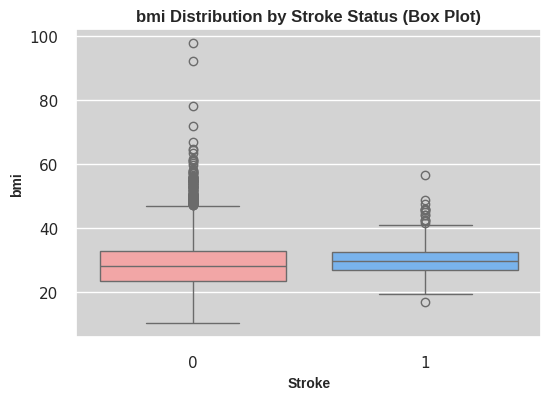

In [38]:
plot_box_plots(df, ['bmi'])

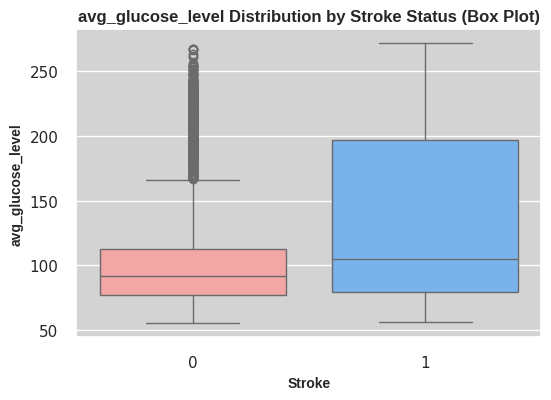

In [39]:
plot_box_plots(df, [ 'avg_glucose_level'])

In [ ]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

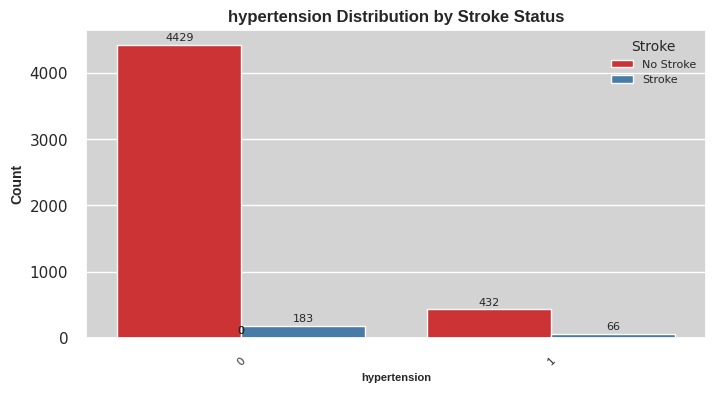

In [40]:
def plot_categorical_count_plots(df, categorical_cols):

    # Define custom palette and font style
    custom_palette = sns.color_palette("Set1")[:2]  # Custom palette with two colors
    font_family = 'Liberation Sans'
    label_fontsize = 8  # Adjust label font size

    for column in categorical_cols:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(x=column, data=df, hue='stroke', palette=custom_palette)

        # Add labels to the bars
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=label_fontsize)

        plt.title(f'{column} Distribution by Stroke Status', fontfamily=font_family, fontsize=12, fontweight='bold')
        plt.xlabel(column, fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
        plt.xticks(rotation=45, fontfamily=font_family, fontsize=label_fontsize)
        plt.ylabel('Count', fontfamily=font_family, fontsize=10, fontweight='bold')
        plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], fontsize=8, title_fontsize=10, loc='upper right')  # Show legend with custom labels and font
        plt.show()

plot_categorical_count_plots(df, ['hypertension'])

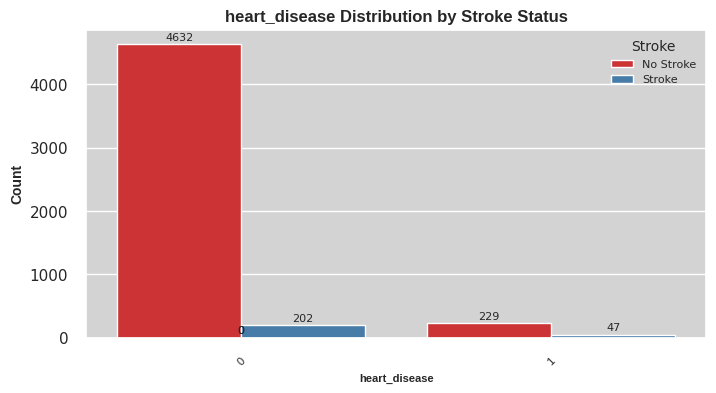

In [41]:
plot_categorical_count_plots(df, ['heart_disease'])

In [42]:
df = df[df['gender'] != 'Other']

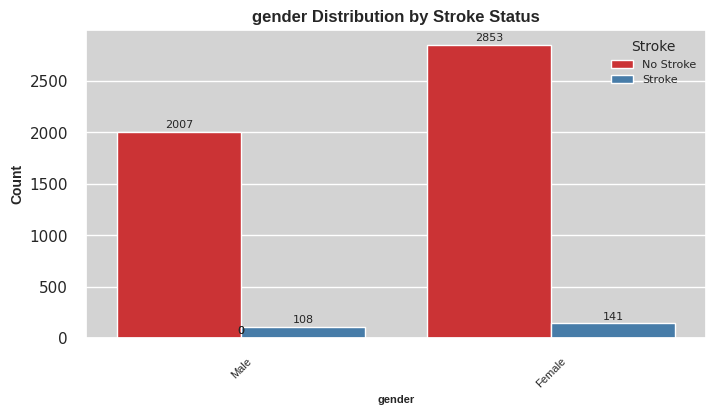

In [43]:
plot_categorical_count_plots(df, ['gender'])

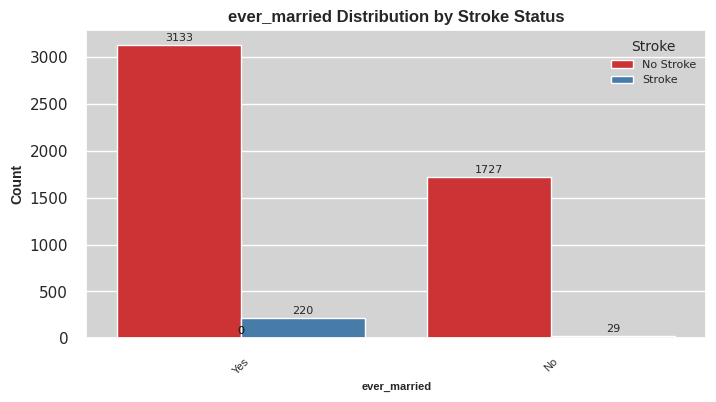

In [44]:
plot_categorical_count_plots(df, ['ever_married'])

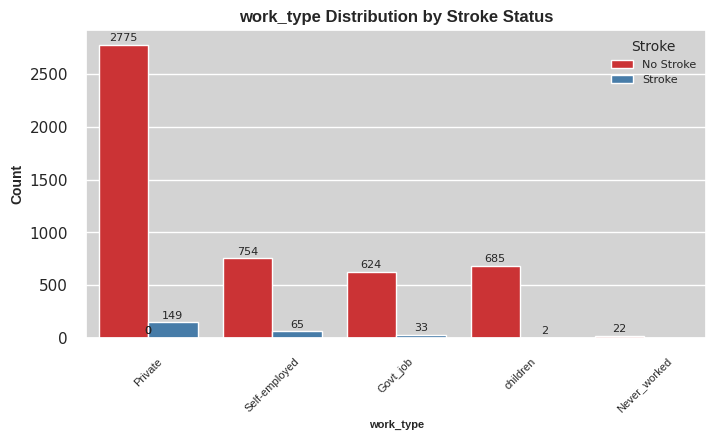

In [45]:
plot_categorical_count_plots(df, ['work_type'])

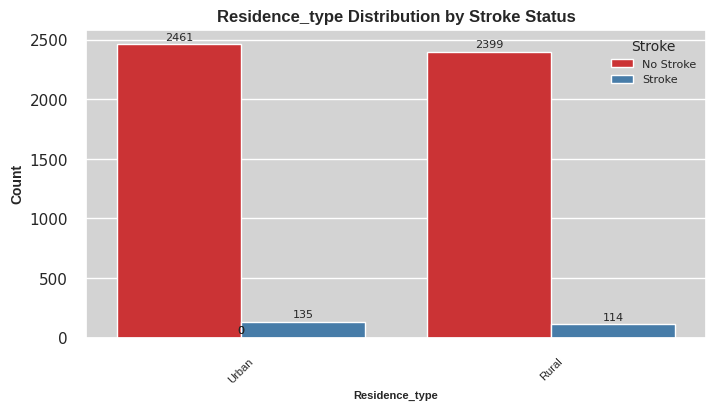

In [46]:
plot_categorical_count_plots(df, ['Residence_type'])

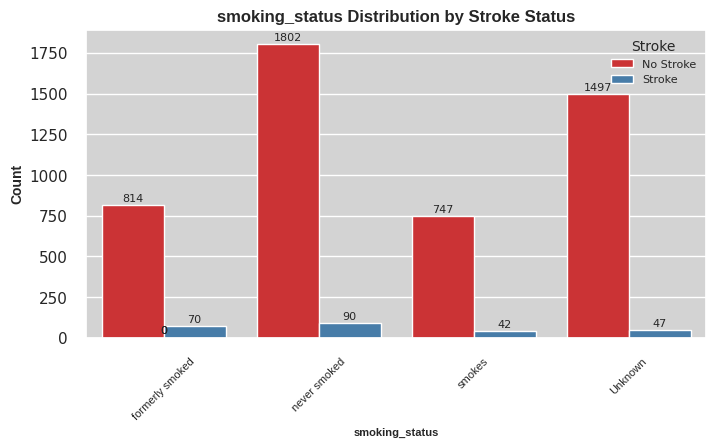

In [47]:
plot_categorical_count_plots(df, ['smoking_status'])

<Figure size 1000x600 with 0 Axes>

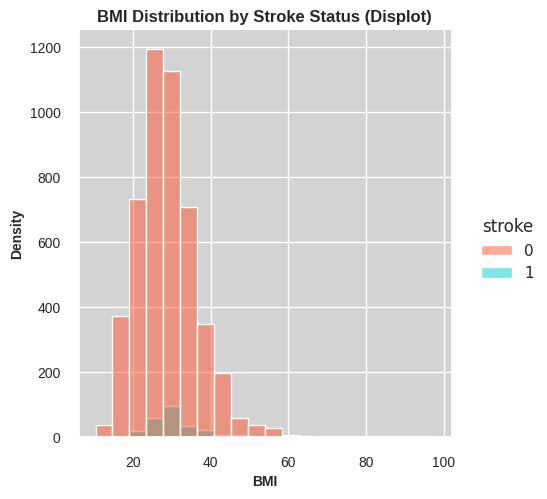

In [48]:
def plot_bmi_distribution(df):

    # Define custom colors and font style
    custom_palette = ['#FF5733', '#00CED1']  # Custom palette with two colors
    font_family = 'Liberation Sans'
    label_fontsize = 10  # Adjust label font size

    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x="bmi", hue="stroke", bins=20, palette=custom_palette)
    plt.title('BMI Distribution by Stroke Status (Displot)', fontfamily=font_family, fontsize=12, fontweight='bold')
    plt.xlabel('BMI', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.ylabel('Density', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.xticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.yticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.show()

plot_bmi_distribution(df)

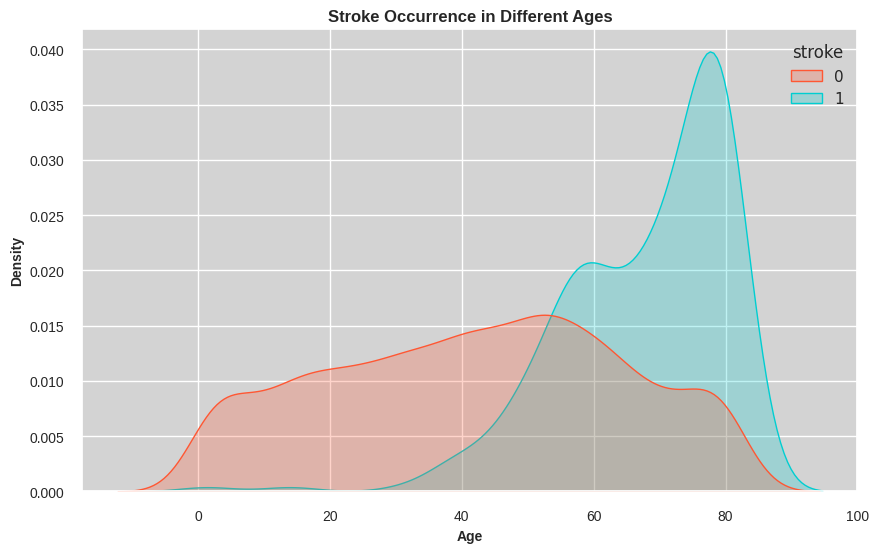

In [49]:
def plot_age_density(df):

    # Define custom colors and font style
    custom_palette = ['#FF5733', '#00CED1']  # Custom palette with two colors
    font_family = 'Liberation Sans'
    label_fontsize = 10  # Adjust label font size

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, palette=custom_palette)
    plt.title('Stroke Occurrence in Different Ages', fontfamily=font_family, fontsize=12, fontweight='bold')
    plt.xlabel('Age', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.ylabel('Density', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.xticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.yticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.show()

plot_age_density(df)

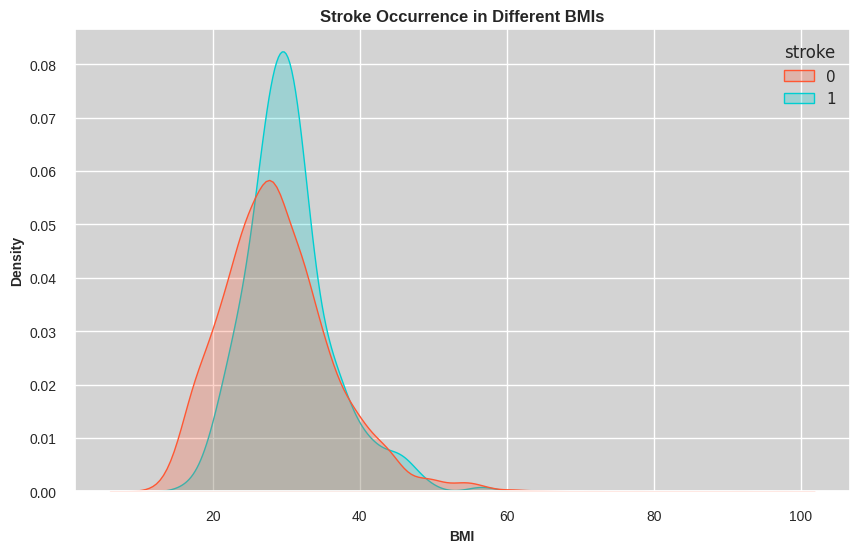

In [50]:
def plot_bmi_density(df):

    # Define custom colors and font style
    custom_palette = ['#FF5733', '#00CED1']  # Custom palette with two colors
    font_family = 'Liberation Sans'
    label_fontsize = 10  # Adjust label font size

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, palette=custom_palette)
    plt.title('Stroke Occurrence in Different BMIs', fontfamily=font_family, fontsize=12, fontweight='bold')
    plt.xlabel('BMI', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.ylabel('Density', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.xticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.yticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.show()

plot_bmi_density(df)

<Figure size 1000x600 with 0 Axes>

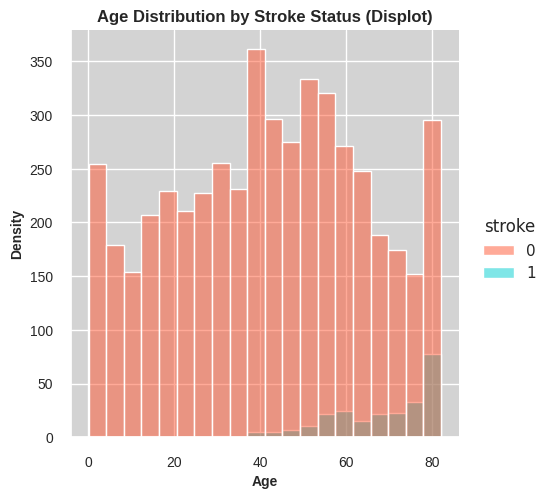

In [51]:
def plot_age_distribution(df):

    # Define custom colors and font style
    custom_palette = ['#FF5733', '#00CED1']  # Custom palette with two colors
    font_family = 'Liberation Sans'
    label_fontsize = 10  # Adjust label font size

    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x="age", hue="stroke", bins=20, palette=custom_palette)
    plt.title('Age Distribution by Stroke Status (Displot)', fontfamily=font_family, fontsize=12, fontweight='bold')
    plt.xlabel('Age', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.ylabel('Density', fontfamily=font_family, fontsize=label_fontsize, fontweight='bold')
    plt.xticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.yticks(fontfamily=font_family, fontsize=label_fontsize)
    plt.show()


plot_age_distribution(df)

<Figure size 2000x1500 with 0 Axes>

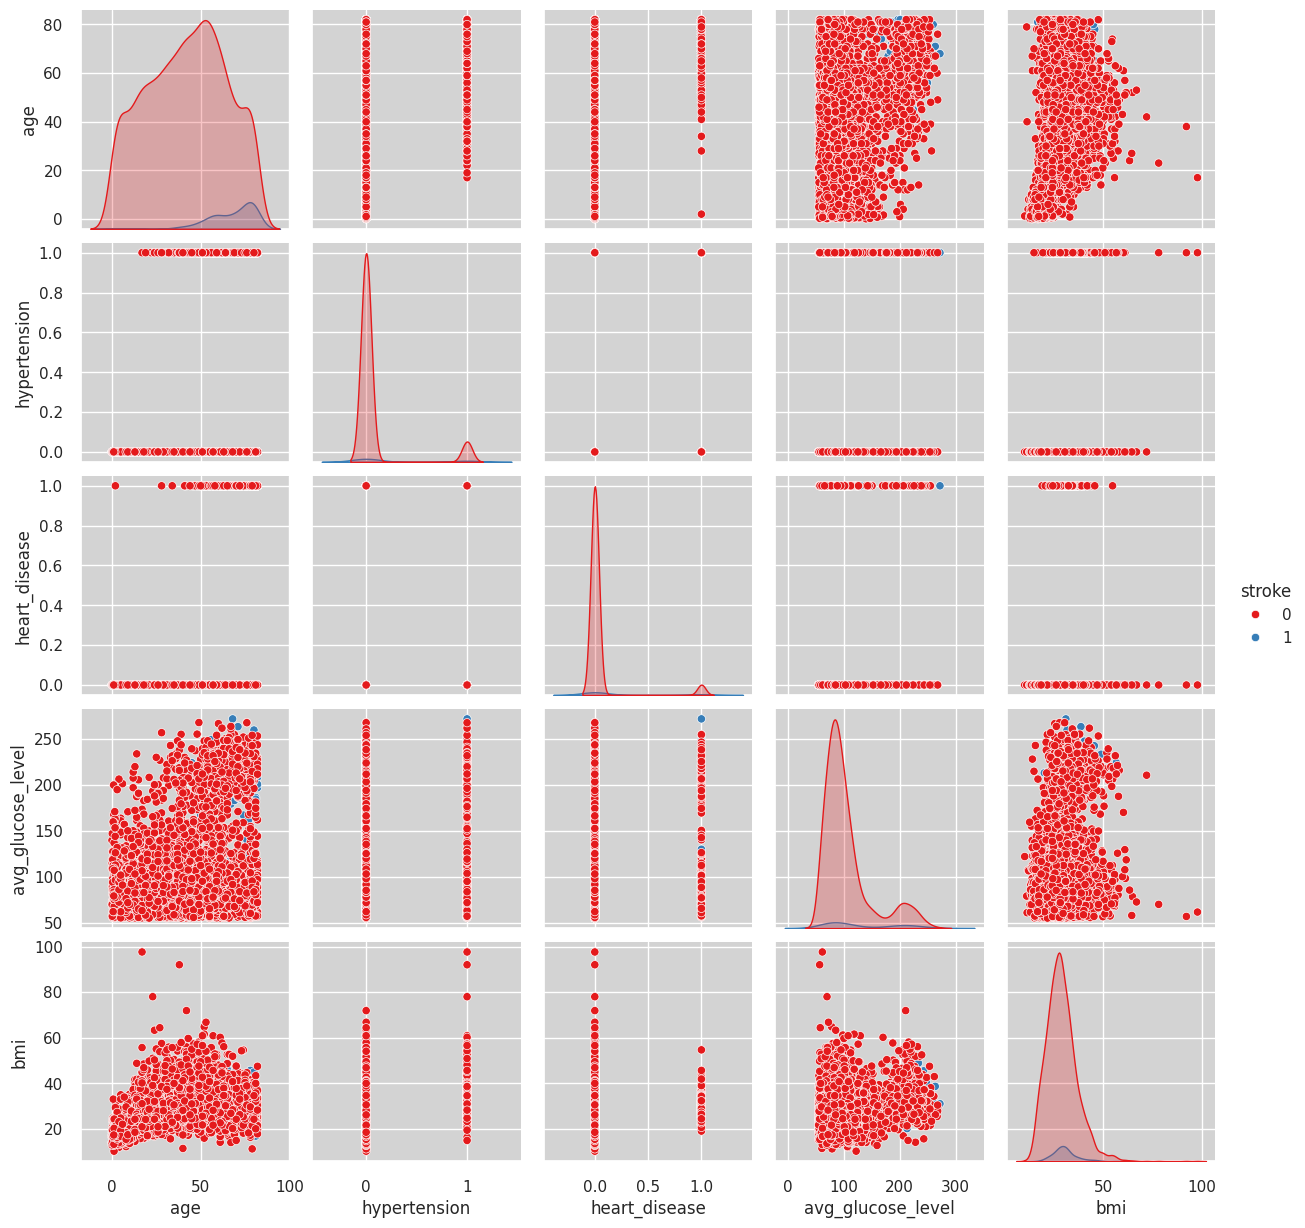

In [52]:
fig = plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df, hue="stroke", palette="Set1")
plt.show()

### 6.2 Label Encoding categorical data

In [21]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [22]:
categorical_cols = df.select_dtypes(include=['object'])

In [23]:
df['ever_married'].value_counts(normalize='true')

ever_married
Yes    0.656164
No     0.343836
Name: proportion, dtype: float64

In [24]:
categorical_cols.describe(include='all')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [25]:
 # Binary encoding to convert gender
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1,'Other':3})

In [26]:
 # Binary encoding to convert "Marriage Status"
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})

In [27]:
#Label Encoding "Work type"
df['work_type'] = df['work_type'].replace({'Private': 0, 'Self-employed': 1,'children':2,'Govt_job':3,'Never_worked':4})

In [28]:
#Label Encoding "Residence_type"
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

In [29]:
#Label Encoding "Smoking status"
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1,'smokes':2,'Unknown':3})

In [30]:
df['Residence_type'].value_counts()

Residence_type
0    2596
1    2514
Name: count, dtype: int64

In [31]:
df['smoking_status'].value_counts()

smoking_status
0    1892
3    1544
1     885
2     789
Name: count, dtype: int64

In [32]:
cross_tab = pd.crosstab(df['stroke'], df['bmi']>60)
cross_tab

bmi,False,True
stroke,,
0,4848,13
1,249,0


### 6.3 Correlation Heatmap

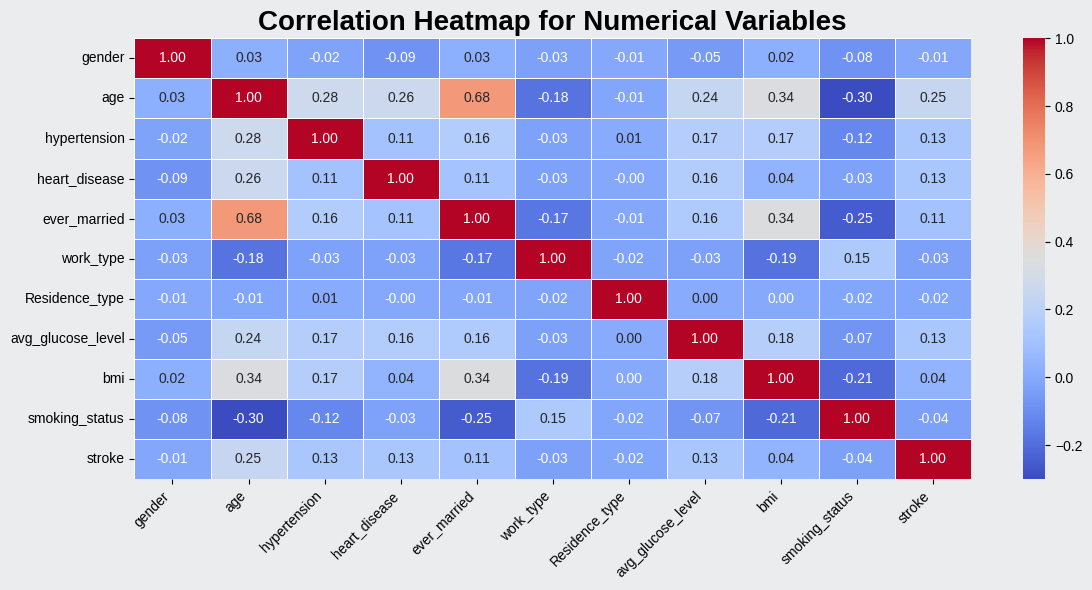

In [33]:
# Set custom font
plt.rcParams['font.family'] = 'Liberation Sans'

# Calculate correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_numerical = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 6), facecolor='#EAECEE')
ax = sns.heatmap(corr_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title with custom font
ax.set_title('Correlation Heatmap for Numerical Variables', fontsize=20, fontname='Liberation Sans', fontweight='bold')

# Set x and y labels with custom font
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10, fontname='Liberation Sans')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10, fontname='Liberation Sans')

plt.tight_layout()
plt.show()

In [34]:
categorical_cols = df.select_dtypes(include=['object'])

## 7. Splitting into Training & Test Sets

In [35]:
# Split data into X (features) and y (target)

# Define features (X) and labels (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7.2 Managing Class Imbalance by oversampling :SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

# Perform oversampling using SMOTE on the training data only

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X_train,y_train)
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2,random_state=23)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote==0)))

# Calculate baseline accuracy
accuracy_baseline_smote = y_train_smote.value_counts(normalize=True).max()
print("Baseline Accuracy:", accuracy_baseline_smote)

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7802, 10)
After OverSampling, the shape of train_y: (7802,) 

After OverSampling, counts of label '1': 3901
After OverSampling, counts of label '0': 3901
Baseline Accuracy: 0.5002403460983816


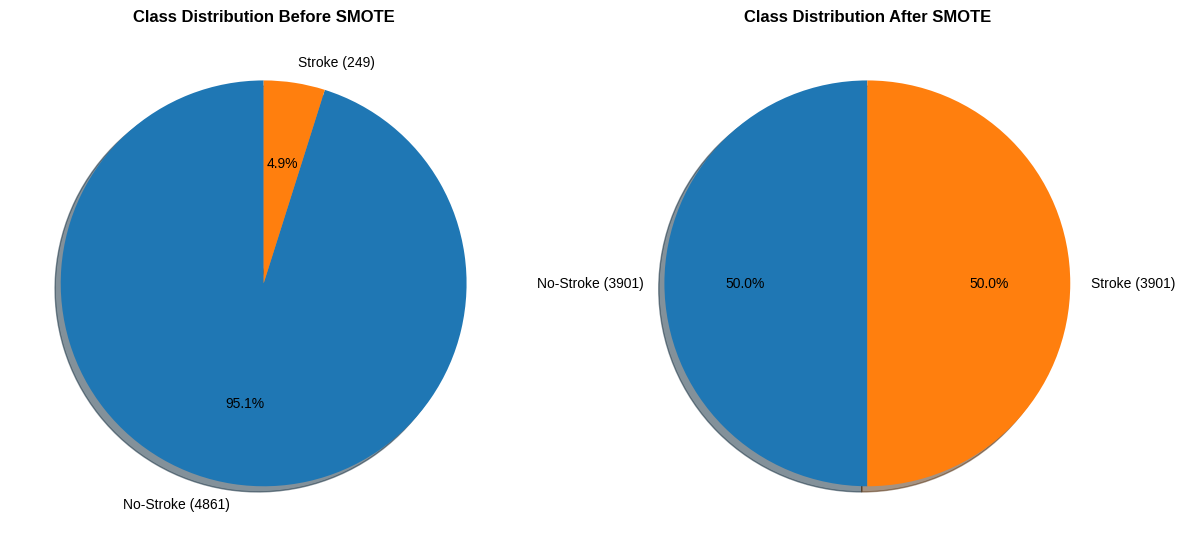

In [38]:
# Calculate the class proportions
original_counts = y.value_counts()
smote_counts = y_smote.value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for original data
labels_original = [f"No-Stroke ({original_counts[0]})", f"Stroke ({original_counts[1]})"]
axs[0].pie(original_counts, labels=labels_original, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 10, 'fontname': 'Liberation Sans'})
axs[0].set_title("Class Distribution Before SMOTE", fontsize=12, fontweight='bold', fontname='Liberation Sans')

# Pie chart for SMOTE data
labels_smote = [f"No-Stroke ({smote_counts[0]})", f"Stroke ({smote_counts[1]})"]
axs[1].pie(smote_counts, labels=labels_smote, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 10, 'fontname': 'Liberation Sans'})
axs[1].set_title("Class Distribution After SMOTE", fontsize=12, fontweight='bold', fontname='Liberation Sans')

plt.tight_layout()
plt.show()

## 8.Baseline Model

In [39]:
y_central = y_smote.mode()
y_test_central = y_test_smote.mode()

In [40]:
y_central

0    0
1    1
Name: stroke, dtype: int64

In [41]:
y_base = np.full(y_smote.shape, y_central.iloc[0])
y_test_base = np.full(y_test_smote.shape, y_test_central.iloc[0])

In [42]:
train_perf = accuracy_score(y_smote, y_base)
test_perf = accuracy_score(y_test_smote, y_test_base)

### 8.2 Baseline Model Performance

In [43]:
print("Training performance: ", train_perf)
print("\nTesting performance: ", test_perf)

Training performance:  0.5

Testing performance:  0.5009609224855862


## 9. Model

### 9.1 Model-1: Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

#### 9.1.1 Training the model

In [45]:
# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

#### 9.1.2 Fitting the Model

In [46]:
# Train the logistic_model on the resampled training data
logistic_model.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

#### 9.1.4 Model Performance : **Logistic Regression**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on test set
y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred).round(3)
precision = precision_score(y_test, y_pred, zero_division=1)  # Set zero_division=1 to avoid warning
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision.round(3))
print("Recall:", recall.round(3))
print("F1 Score:", f1.round(3))
print("ROC AUC Score:", roc_auc.round(3))

Accuracy: 0.814
Precision: 0.167
Recall: 0.516
F1 Score: 0.252
ROC AUC Score: 0.675


#### 9.1.5 **Cross Validation using Grid Search**

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search
param_grid_LogReg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term
    'solver': ['liblinear'],  # Algorithm to use for optimization
    'max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Create the GridSearchCV object
grid_search_LogReg = GridSearchCV(logistic_regression, param_grid_LogReg, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best parameters
grid_search_LogReg.fit(x_train_smote, y_train_smote)

# Get the best parameters
best_params_LogReg = grid_search_LogReg.best_params_
print("Best Parameters:", best_params_LogReg)

# Get the best model
best_model_LogReg = grid_search_LogReg.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


#### 9.1.6 Accuracy Scores after Grid Search Cross Validation

In [49]:
# Make predictions with adjusted threshold
y_pred_proba = best_model_LogReg.predict_proba(X_test)
y_pred_adjusted = (y_pred_proba[:,1] > 0.3).astype(int)  # Adjust threshold here

# Calculate evaluation metrics
accuracy_LogReg_gridCV = accuracy_score(y_test, y_pred_adjusted)
recall_LogReg_gridCV = recall_score(y_test, y_pred_adjusted)
f1_LogReg_gridCV = f1_score(y_test,y_pred_adjusted)
precision_LogReg_gridCV = precision_score(y_test, y_pred_adjusted, zero_division=1)
roc_auc_LogReg_gridCV = roc_auc_score(y_test,y_pred_adjusted)

print("LogReg Set Accuracy after GridCV:", accuracy_LogReg_gridCV.round(4))
print("LogReg Precision after GridCV:", precision_LogReg_gridCV.round(4))
print("LogReg Recall after GridCV:", recall_LogReg_gridCV.round(4))
print("LogReg F1-score after GridCV:", f1_LogReg_gridCV.round(4))
print("LogReg ROC AUC score after GridCV:", roc_auc_LogReg_gridCV.round(4))

LogReg Set Accuracy after GridCV: 0.6703
LogReg Precision after GridCV: 0.1314
LogReg Recall after GridCV: 0.7903
LogReg F1-score after GridCV: 0.2253
LogReg ROC AUC score after GridCV: 0.7264


### 9.1.7 Visualising Model Performance

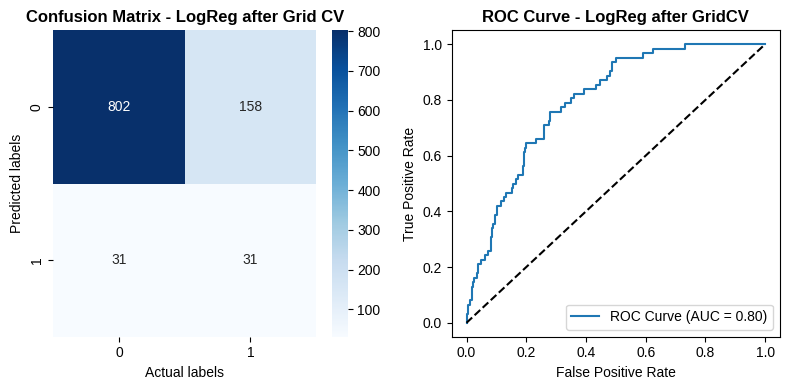

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, set_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'Confusion Matrix - {set_name}', fontsize=12, fontweight='bold',fontname='Liberation Sans')
    ax.set_xlabel('Actual labels', fontsize=10,fontname='Liberation Sans')
    ax.set_ylabel('Predicted labels', fontsize=10,fontname='Liberation Sans')

# Function to plot ROC curve
def plot_roc_curve(ax, model, X, y, set_name):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    ax.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate', fontsize=10,fontname='Liberation Sans')
    ax.set_ylabel('True Positive Rate', fontsize=10,fontname='Liberation Sans')
    ax.set_title(f'ROC Curve - {set_name}', fontsize=12, fontweight='bold',fontname='Liberation Sans')
    ax.legend(loc='lower right')

# Create subplots with one plot per row
fig, axs = plt.subplots(1, 2, figsize=(8,4))  # Adjust the figsize as needed

# Plot confusion matrix for testing set
plot_confusion_matrix(axs[0], y_test, best_model_LogReg.predict(X_test), "LogReg after Grid CV")

# Plot ROC curve for testing set
plot_roc_curve(axs[1], best_model_LogReg, X_test, y_test, "LogReg after GridCV")

plt.tight_layout()
plt.show()

#### 9.1.8 **Feature Importance** : Logistic regression

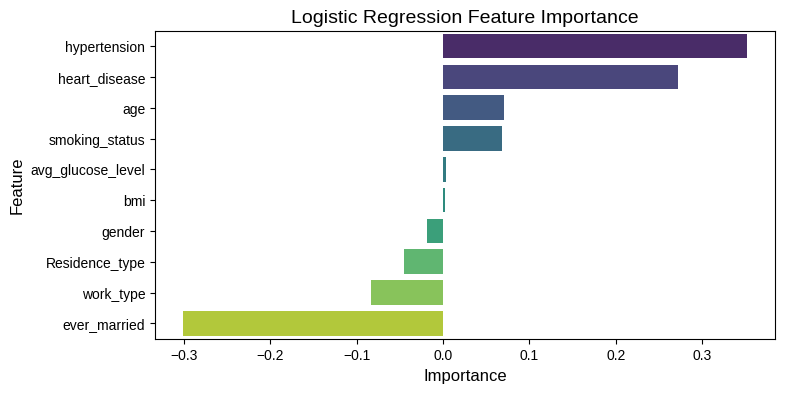

In [51]:
# Train your logistic regression model
logistic_model.fit(X_train, y_train)

# Get feature coefficients
feature_importance = logistic_model.coef_[0]

# Map coefficients to feature names
feature_names = X.columns

# Create a DataFrame for better manipulation
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features based on importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Logistic Regression Feature Importance', fontsize=14,fontname='Liberation Sans')
plt.xlabel('Importance', fontsize=12,fontname='Liberation Sans')
plt.ylabel('Feature', fontsize=12,fontname='Liberation Sans')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 9.2 Model-2: Support Vector Machine

#### 9.2.1 Importing packages

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#### 9.2.2 Initializing the model

In [53]:
# Initialize the SVM classifier
svm_classifier = SVC()

#### 9.2.3 Training the model on resampled data

In [54]:
# Train the SVM classifier on the resampled training data
svm_classifier.fit(x_train_smote, y_train_smote)

SVC()

#### 9.2.4 Predicting

In [55]:
# Predict on test set
y_test_pred_SVC = svm_classifier.predict(X_test)

#### 9.2.5 Evaluating model performance

In [56]:

# Calculate evaluation metrics for test set
test_accuracy_SVM = accuracy_score(y_test, y_test_pred_SVC)  # Using y_test_smote for the test labels after SMOTE
test_precision_SVM = precision_score(y_test, y_test_pred_SVC)  # Using y_test_smote for the test labels after SMOTE
test_recall_SVM = recall_score(y_test, y_test_pred_SVC)  # Using y_test_smote for the test labels after SMOTE
test_f1_SVM = f1_score(y_test, y_test_pred_SVC)  # Using y_test_smote for the test labels after SMOTE


In [57]:
# Predict decision scores on validation set
decision_scores_test_SVM = svm_classifier.decision_function(X_test)  # Using x_test_smote for the test features after SMOTE

In [58]:

# Calculate ROC AUC score using decision scores
test_roc_auc_SVM = roc_auc_score(y_test, decision_scores_test_SVM)  # Using y_test_smote for the test labels after SMOTE

print("\n SVM Model Performance Set Metrics:\n")
print("SVM Accuracy:", test_accuracy_SVM.round(4))
print("SVM Precision:", test_precision_SVM.round(4))
print("SVM Recall:", test_recall_SVM.round(4))
print("SVM F1-score:", test_f1_SVM.round(4))
print("SVM ROC AUC score:", test_roc_auc_SVM.round(4))


 SVM Model Performance Set Metrics:

SVM Accuracy: 0.7397
SVM Precision: 0.1554
SVM Recall: 0.7419
SVM F1-score: 0.257
SVM ROC AUC score: 0.8367


#### 9.2.6 SVM Model Accuracy Scores after **Grid Search Cross Validation**

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # List of C values to search over
    'kernel': ['rbf'],  # Only 'rbf' kernel type
    'gamma': ['scale'],  # Only 'scale' for gamma
}



In [60]:

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train_smote, y_train_smote)  # Assuming X_train_resampled and y_train_resampled are the resampled data after SMOTE

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_svm_classifier = grid_search.best_estimator_

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


#### 9.2.7 Testing S**VM model after Hyperparameter Tuning**

In [61]:
# Evaluate the best model on the test set
test_accuracy_SVM_GridCV = best_svm_classifier.score(X_test, y_test)
print("\nSVM after GridSearch Accuracy:", test_accuracy_SVM_GridCV.round(4))



SVM after GridSearch Accuracy: 0.7622


In [62]:

# Make predictions on the test set
y_test_pred_SVMGridCV = best_svm_classifier.predict(X_test)  # Assuming x_test_smote is the test set after SMOTE

# Calculate precision, recall, F1-score for test set
test_precision_SVMGridCV = precision_score(y_test, y_test_pred_SVMGridCV)  # Using y_test_smote for the test labels after SMOTE
test_recall_SVMGridCV = recall_score(y_test, y_test_pred_SVMGridCV)  # Using y_test_smote for the test labels after SMOTE
test_f1_SVMGridCV = f1_score(y_test, y_test_pred_SVMGridCV)  # Using y_test_smote for the test labels after SMOTE

# Calculate ROC AUC score for test set using decision_function
test_roc_auc_SVMGridCV = roc_auc_score(y_test, best_svm_classifier.decision_function(X_test))  # Using y_test_smote for the test labels after SMOTE



#### 9.2.8 **SVM Model Performance Summary**

In [63]:

print("\n SVM Model Performance Before Tuning :\n")
print("SVM Accuracy:", test_accuracy_SVM.round(4))
print("SVM Precision:", test_precision_SVM.round(4))
print("SVM Recall:", test_recall_SVM.round(4))
print("SVM F1-score:", test_f1_SVM.round(4))
print("SVM ROC AUC score:", test_roc_auc_SVM.round(4),"\n")

print("\n SVM Model Performance after GridCV Set Metrics:\n")
print("SVM after GridCV Accuracy:", test_accuracy_SVM_GridCV.round(4))
print("SVM after GridCV Precision:", test_precision_SVMGridCV.round(4))
print("SVM after GridCV Recall:", test_recall_SVMGridCV.round(4))
print("SVM after GridCV F1-score:", test_f1_SVMGridCV.round(4))
print("SVM after GridCV ROC AUC score:", test_roc_auc_SVMGridCV.round(4))


 SVM Model Performance Before Tuning :

SVM Accuracy: 0.7397
SVM Precision: 0.1554
SVM Recall: 0.7419
SVM F1-score: 0.257
SVM ROC AUC score: 0.8367 


 SVM Model Performance after GridCV Set Metrics:

SVM after GridCV Accuracy: 0.7622
SVM after GridCV Precision: 0.1661
SVM after GridCV Recall: 0.7258
SVM after GridCV F1-score: 0.2703
SVM after GridCV ROC AUC score: 0.8344


#### 9.2.9 Visualizing SVM model performance

In [64]:
# Fit the model on training data
svm_classifier.fit(x_train_smote, y_train_smote)

SVC()

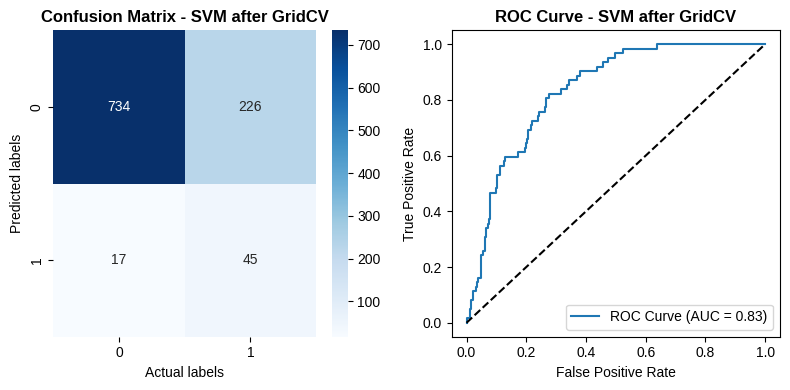

In [65]:

# Function to plot SVM ROC curve using decision function
def plot_roc_curve(ax, model, X, y, set_name):
    y_pred_decision = model.decision_function(X)
    fpr, tpr, _ = roc_curve(y, y_pred_decision)
    auc = roc_auc_score(y, y_pred_decision)

    ax.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_title(f'ROC Curve - {set_name}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right')

# Create subplots with one plot per row
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize as needed

# Plot confusion matrix for testing set
plot_confusion_matrix(axs[0], y_test, best_svm_classifier.predict(X_test), "SVM after GridCV")

# Plot ROC curve for testing set
plot_roc_curve(axs[1], best_svm_classifier, X_test, y_test, "SVM after GridCV")

plt.tight_layout()
plt.show()

### 9.4 Model-3: **Random Forest Classifier**

#### 9.4.1 Importing packages

In [66]:
from sklearn.ensemble import RandomForestClassifier

#### 9.4.2 Initializing the model

In [67]:
# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#### 9.4.3 Training the model

In [68]:
# Train the Random Forest Classifier on the training data
rf_classifier.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

#### 9.4.5 Predicting

In [69]:
# Predict on the test set
y_test_pred_rf = rf_classifier.predict(X_test)  # Assuming x_test_smote is the test set after SMOTE

#### 9.4.6 **Random Forest** Model Performance Summary

In [70]:

# Calculate evaluation metrics for test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print("\Random Forest  Set Metrics:")
print("Random Forest Accuracy:", test_accuracy_rf.round(4))
print("Random Forest Precision:", test_precision_rf.round(4))
print("Random Forest Recall:", test_recall_rf.round(4))
print("Random Forest F1-score:", test_f1_rf.round(4))
print("Random Forest ROC AUC score:", test_roc_auc_rf.round(4))

\Random Forest  Set Metrics:
Random Forest Accuracy: 0.9061
Random Forest Precision: 0.1852
Random Forest Recall: 0.1613
Random Forest F1-score: 0.1724
Random Forest ROC AUC score: 0.5577


#### 9.4.7 Random Forest Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [72]:

# Define the parameter distributions for randomized search
param_distributions = {
    'n_estimators': np.arange(100, 501, 100),  # Range of values for n_estimators
    'max_depth': np.arange(1, 21),  # Range of values for max_depth
    'min_samples_split': np.arange(2, 21),  # Range of values for min_samples_split
    'min_samples_leaf': np.arange(1, 21),  # Range of values for min_samples_leaf
    'max_features': np.arange(0.1, 1.1, 0.1)  # Range of values for max_features
}

rf_classifier1 = RandomForestClassifier(random_state=41)

# Initialize RandomizedSearchCV with 50 iterations and 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier1, param_distributions=param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Perform randomized search to find the best hyperparameters
random_search.fit(x_train_smote, y_train_smote)  # Assuming X_train_resampled and y_train_resampled are the resampled data after SMOTE


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                                        'n_estimators': array([100, 200, 300, 400, 500])},
                   random_state=42)

In [73]:

# Get the best parameters and model
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.4, 'max_depth': 14}


In [74]:
# Evaluate the best model on the resampled test set
test_accuracy_rf = best_rf_model.score(X_test, y_test)
print("\nTest Set Accuracy:", test_accuracy_rf)

# Make predictions on the resampled test set
y_test_pred_rf1 = best_rf_model.predict(X_test)

# Calculate precision, recall, F1-score, and ROC AUC score for the resampled test set
test_accuracy_rf1 = accuracy_score(y_test, y_test_pred_rf1)
test_precision_rf1 = precision_score(y_test, y_test_pred_rf1)
test_recall_rf1 = recall_score(y_test, y_test_pred_rf1)
test_f1_rf1 = f1_score(y_test, y_test_pred_rf1)
test_roc_auc_rf1 = roc_auc_score(y_test_pred_rf1, best_rf_model.predict_proba(X_test)[:, 1])

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy_rf1)
print("Precision:", test_precision_rf1)
print("Recall:", test_recall_rf1)
print("F1-score:", test_f1_rf1)
print("ROC AUC score:", test_roc_auc_rf1)


Test Set Accuracy: 0.8855185909980431

Test Set Metrics:
Accuracy: 0.8855185909980431
Precision: 0.1686746987951807
Recall: 0.22580645161290322
F1-score: 0.19310344827586204
ROC AUC score: 1.0


In [75]:

# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, set_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'Confusion Matrix - {set_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Actual labels', fontsize=10)
    ax.set_ylabel('Predicted labels', fontsize=10)

In [76]:

# Function to plot ROC curve
def plot_roc_curve(ax, model, X, y, set_name):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    ax.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_title(f'ROC Curve - {set_name}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right')

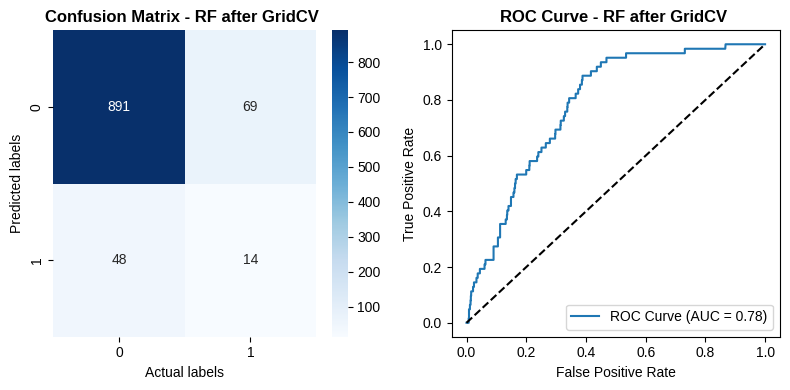

In [77]:


# Train the best Random Forest Classifier on the training data
best_rf_model.fit(x_train_smote, y_train_smote)


# Create subplots with one plot per row
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize as needed

# Plot confusion matrix for the resampled testing set
plot_confusion_matrix(axs[0], y_test, best_rf_model.predict(X_test), "RF after GridCV ")

# Plot ROC curve for the resampled testing set
plot_roc_curve(axs[1], best_rf_model, X_test, y_test, "RF after GridCV ")

plt.tight_layout()
plt.show()

### 9.5 Model-4 Extra Trees Classifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()

In [79]:
# After cross-validation, you can train the model on the entire training set and evaluate it on the holdout test set
et_classifier.fit(x_train_smote, y_train_smote)

ExtraTreesClassifier()

In [80]:
# Predict on the test set
y_test_pred_Xtra = et_classifier.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy_Xtra = accuracy_score(y_test, y_test_pred_Xtra)
test_precision_Xtra = precision_score(y_test, y_test_pred_Xtra)
test_recall_Xtra = recall_score(y_test, y_test_pred_Xtra)
test_f1_Xtra = f1_score(y_test, y_test_pred_Xtra)
test_roc_auc_Xtra = roc_auc_score(y_test, et_classifier.predict_proba(X_test)[:, 1])

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy_Xtra.round(4))
print("Precision:", test_precision_Xtra.round(4))
print("Recall:", test_recall_Xtra.round(4))
print("F1-score:", test_f1_Xtra.round(4))
print("ROC AUC score:", test_roc_auc_Xtra.round(4))


Test Set Metrics:
Accuracy: 0.8943
Precision: 0.1806
Recall: 0.2097
F1-score: 0.194
ROC AUC score: 0.7469


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for randomized search
param_dist = {
    'n_estimators': randint(100, 300),  # Reduce the range of n_estimators
    'max_depth': [None, 10, 20],  # Reduce the number of options for max_depth
    'min_samples_split': randint(2, 10),  # Reduce the range of min_samples_split
    'min_samples_leaf': randint(1, 5),  # Reduce the range of min_samples_leaf
    'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 20}, None]  # Weights associated with classes
}

# Reduce the number of iterations
n_iter = 50

# Initialize the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=et_classifier, param_distributions=param_dist, n_iter=n_iter, cv=5, random_state=42)

# Perform randomized search to find the best hyperparameters
random_search.fit(x_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_et_classifier = random_search.best_estimator_

Best Hyperparameters: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 104}


In [82]:
# Evaluate the best model on the test set
test_accuracy_Xtra_tuned = best_et_classifier.score(X_test, y_test)
print("\nOversampled Test Set Accuracy:", test_accuracy_Xtra_tuned)

# Make predictions on the oversampled test set
y_test_pred_Xtra_tuned = best_et_classifier.predict(X_test)

# Calculate precision, recall, F1-score, and ROC AUC score for oversampled test set
test_precision_Xtra_tuned = precision_score(y_test, y_test_pred_Xtra_tuned)
test_recall_Xtra_tuned = recall_score(y_test, y_test_pred_Xtra_tuned)
test_f1_Xtra_tuned = f1_score(y_test, y_test_pred_Xtra_tuned)
test_roc_auc_Xtra_tuned = roc_auc_score(y_test, best_et_classifier.predict_proba(X_test)[:, 1])

print("Extra Trees Tuned Precision:", test_precision_Xtra_tuned.round(4))
print("Extra Trees Tuned Test Recall:", test_recall_Xtra_tuned.round(4))
print("Extra Trees Tuned Test F1-score:", test_f1_Xtra_tuned.round(4))
print("Extra Trees Tuned Test ROC AUC score:", test_roc_auc_Xtra_tuned.round(4))


Oversampled Test Set Accuracy: 0.8943248532289628
Extra Trees Tuned Precision: 0.1806
Extra Trees Tuned Test Recall: 0.2097
Extra Trees Tuned Test F1-score: 0.194
Extra Trees Tuned Test ROC AUC score: 0.762


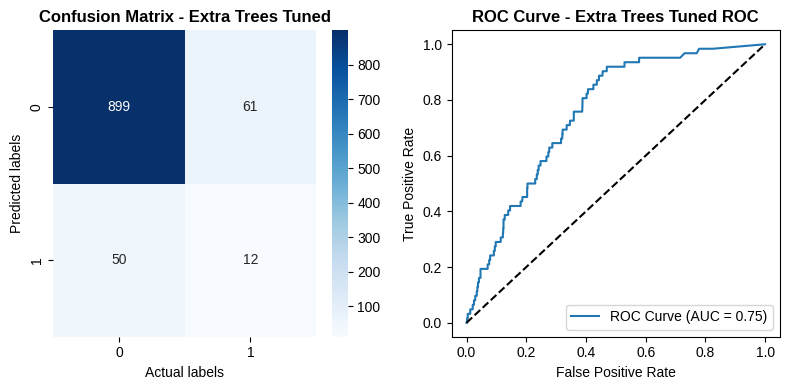

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Train the best Extra Trees Classifier on the SMOTE-resampled training data
best_et_classifier.fit(x_train_smote, y_train_smote)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, set_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'Confusion Matrix - {set_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Actual labels', fontsize=10)
    ax.set_ylabel('Predicted labels', fontsize=10)

# Function to plot ROC curve
def plot_roc_curve(ax, model, X, y, set_name):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    ax.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_title(f'ROC Curve - {set_name}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right')

# Create subplots with one plot per row
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize as needed

# Plot confusion matrix for testing set
plot_confusion_matrix(axs[0], y_test, best_et_classifier.predict(X_test), "Extra Trees Tuned")

# Plot ROC curve for testing set
plot_roc_curve(axs[1], best_et_classifier, X_test, y_test, "Extra Trees Tuned ROC")

plt.tight_layout()
plt.show()

In [85]:
# Define the evaluation metrics for each model
metrics_data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "Extra Trees"],
    "Accuracy": [accuracy_LogReg_gridCV.round(4), test_accuracy_SVM_GridCV.round(4),
                 test_accuracy_rf1, test_accuracy_Xtra_tuned],
    "Precision": [precision_LogReg_gridCV.round(4), test_precision_SVMGridCV.round(4),
                  test_precision_rf1, test_precision_Xtra_tuned.round(4)],
    "Recall": [recall_LogReg_gridCV.round(4), test_recall_SVMGridCV.round(4),
               test_recall_rf1, test_recall_Xtra_tuned.round(4)],
    "F1-score": [f1_LogReg_gridCV.round(4), test_f1_SVMGridCV.round(4),
                 test_f1_rf1, test_f1_Xtra_tuned.round(4)],
    "ROC AUC": [roc_auc_LogReg_gridCV.round(4), test_roc_auc_SVMGridCV.round(4),
                test_roc_auc_rf1, test_roc_auc_Xtra_tuned.round(4)]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set 'Model' column as index
metrics_df.set_index("Model", inplace=True)

# Display the DataFrame
print(metrics_df)

                     Accuracy  Precision    Recall  F1-score  ROC AUC
Model                                                                
Logistic Regression  0.670300   0.131400  0.790300  0.225300   0.7264
SVM                  0.762200   0.166100  0.725800  0.270300   0.8344
Random Forest        0.885519   0.168675  0.225806  0.193103   1.0000
Extra Trees          0.894325   0.180600  0.209700  0.194000   0.7620


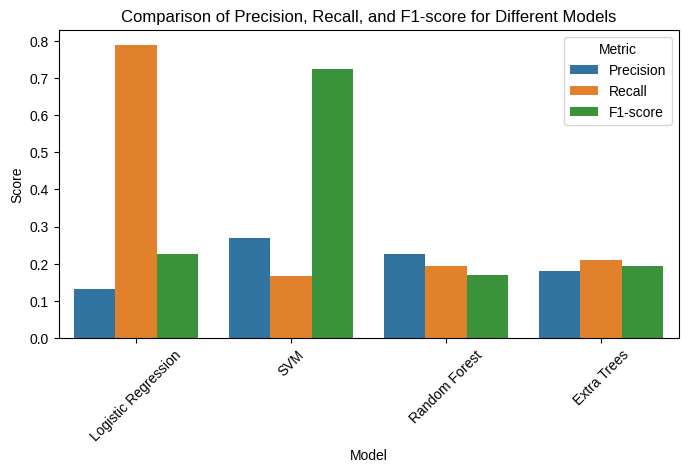

In [87]:
# Define the metrics and models
metrics = ["Precision", "Recall", "F1-score"]
models = ["Logistic Regression", "SVM", "Random Forest", "Extra Trees"]

# Define the scores
precision_scores = [precision_LogReg_gridCV, test_precision_SVMGridCV,
                    test_precision_rf1, test_precision_Xtra_tuned]
recall_scores = [recall_LogReg_gridCV, test_recall_SVMGridCV,
                 test_recall_rf1, test_recall_Xtra_tuned]
f1_scores = [f1_LogReg_gridCV, test_f1_SVMGridCV,
             test_f1_rf1, test_f1_Xtra_tuned]

# Create a DataFrame for the scores
scores_df = pd.DataFrame({
    "Model": models * 3,
    "Metric": metrics * 4,
    "Score": precision_scores + recall_scores + f1_scores
})

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=scores_df, x="Model", y="Score", hue="Metric")
plt.title("Comparison of Precision, Recall, and F1-score for Different Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()

## 9.6 Train a Decision Tree with Default Hyperparameters

### 7.1 Import DecisionTreeClassifier from sklearn.tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### 7.2 Instantiate a DecisionTreeClassifier() model with random_state=42 parameter in order to keep our results consistent

In [ ]:
tree_1 = DecisionTreeClassifier(random_state=42)

### 7.3 Train the model on the training set and save the predictions from the test set


In [ ]:
tree_1.fit(x_train_smote, y_train_smote)

y_train_preds = tree_1.predict(x_train_smote)

y_pred = tree_1.predict(X_test)

In [ ]:
print("Accuracy score on Testing Data",accuracy_score(y_test, y_pred).round(5)*100)

Accuracy score on Training Data 100.0
Accuracy score on Testing Data 83.757


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print("F1 score of Testing Data",f1_score(y_test, y_pred, average='weighted').round(5))

F1 score of Testing Data 0.8638


### 7.6 Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Calculate precision, recall, F1-score, and ROC AUC score for the resampled test set
test_accuracy_dt = accuracy_score(y_test, y_pred)
test_precision_dt = precision_score(y_test, y_pred)
test_recall_dt = recall_score(y_test, y_pred)
test_f1_dt = f1_score(y_test, y_pred)
test_roc_auc_dt = roc_auc_score(y_test, tree_1.predict_proba(X_test)[:, 1])

print("\nTest Set Metrics:")
print("Decision tree Accuracy:", test_accuracy_dt.round(4))
print("Decision tree Precision:", test_precision_dt.round(4))
print("Decision tree Recall:", test_recall_dt.round(4))
print("Decision tree F1-score:", test_f1_dt.round(4))
print("Decision tree ROC AUC score:", test_roc_auc_dt.round(4))


Test Set Metrics:
Decision tree Accuracy: 0.8376
Decision tree Precision: 0.1061
Decision tree Recall: 0.2258
Decision tree F1-score: 0.1443
Decision tree ROC AUC score: 0.5514


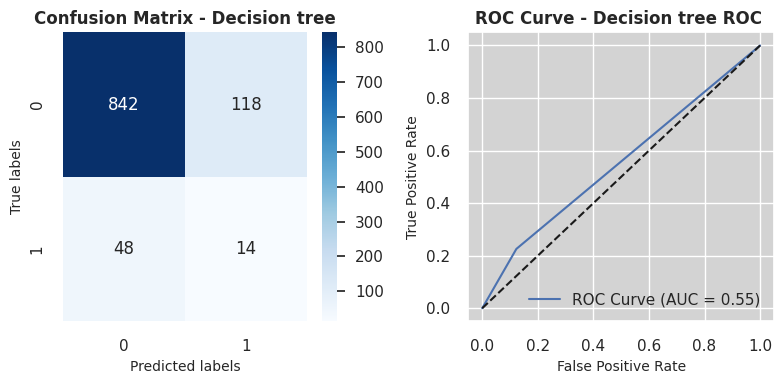

In [ ]:


# Train the best Random Forest Classifier on the training data
tree_1.fit(x_train_smote, y_train_smote)


# Create subplots with one plot per row
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot confusion matrix for the resampled testing set
plot_confusion_matrix(axs[0], y_test, tree_1.predict(X_test), "Decision tree")

# Plot ROC curve for the resampled testing set
plot_roc_curve(axs[1], tree_1, X_test, y_test, "Decision tree ROC ")

plt.tight_layout()
plt.show()